In [41]:
# imports 
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt      
%matplotlib inline
import statsmodels.api as sm

In [42]:
df=pd.read_csv("Airbnb_DataFrame_After_Cleaning.csv")
df.describe()

,Rating,Price,Reviews,Location,Cleanliness,Communication,Value for Money,Accuracy,Check-in,Guests,TV,Wifi,Free street parking,Privet parking,Refrigerator,Air conditioning,Kitchen,Pets allowd,Dedicated workspace,Security cameras
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000
mean,4.805778,22638.246512,46.650646,4.792145,4.774522,4.890904,4.736176,4.839587,4.894729,3.265116,0.278553,0.874935,0.324031,0.357623,0.014987,0.131266,0.931783,0.171059,0.603101,0.002584
std,0.229267,33456.617817,68.601015,0.248304,0.277280,0.201519,0.255313,0.221151,0.176497,2.156853,0.448403,0.330878,0.468133,0.479424,0.121532,0.337778,0.252183,0.376658,0.489381,0.050780
min,1.670000,2071.000000,3.000000,2.000000,1.700000,2.500000,2.700000,1.300000,2.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.720000,8348.500000,7.000000,4.700000,4.700000,4.900000,4.700000,4.800000,4.900000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.870000,13379.000000,20.000000,4.900000,4.900000,5.000000,4.800000,4.900000,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,4.980000,22495.500000,57.000000,5.000000,5.000000,5.000000,4.900000,5.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.000000,526361.000000,571.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## we saw in the visualization the connection between the Rating to other columns

In [59]:
linear = linear_model.LinearRegression() # create a linear regression object
#culomn Target vs realevent data
x = df[["Price","Reviews",
    "Location", "Cleanliness",
    "Communication", "Value for Money",
     "Accuracy","Check-in","Guests",
     "TV","Wifi","Free street parking","Privet parking",
     "Refrigerator","Air conditioning",
     "Kitchen","Pets allowd","Dedicated workspace",'Security cameras']]
y = df['Rating']
linear.fit(X=x, y=y)



LinearRegression()

In [60]:
#we should get now all β1,β2.....β19(for each of the attributes) and find β0
print("Slope:",linear.coef_)
print("Intercept:",linear.intercept_)

Slope: [ 3.62128195e-07 -1.38065838e-04  8.75900269e-02  2.06441775e-01
  1.53691026e-01  1.97939527e-01  3.09104375e-01  1.33163160e-01
 -1.05004480e-03 -2.82446530e-03  2.89950097e-03 -7.29951723e-03
 -1.58946249e-02 -2.11683025e-02  1.70090977e-02  6.18212471e-03
  1.11013629e-02  1.35849625e-02  3.45815566e-02]
Intercept: -0.44641295735235165


In [61]:
print("R2:",linear.score(x,y))

R2: 0.8237386145442411


In [62]:
print(df.corr())

                       Rating     Price   Reviews  Location  Cleanliness  \
Rating               1.000000  0.167773  0.018550  0.517852     0.759563   
Price                0.167773  1.000000 -0.095268  0.173167     0.146511   
Reviews              0.018550 -0.095268  1.000000  0.019730     0.069215   
Location             0.517852  0.173167  0.019730  1.000000     0.358399   
Cleanliness          0.759563  0.146511  0.069215  0.358399     1.000000   
Communication        0.694602  0.103622  0.055604  0.355487     0.550230   
Value for Money      0.756629  0.031951  0.097553  0.433091     0.591344   
Accuracy             0.826425  0.115267  0.051179  0.470632     0.710587   
Check-in             0.712248  0.122565  0.036864  0.430168     0.582264   
Guests               0.091970  0.614412 -0.057146  0.047626     0.112542   
TV                  -0.058365 -0.102290 -0.078292  0.013161    -0.074305   
Wifi                -0.074853  0.015031  0.021924 -0.049725    -0.055601   
Free street 

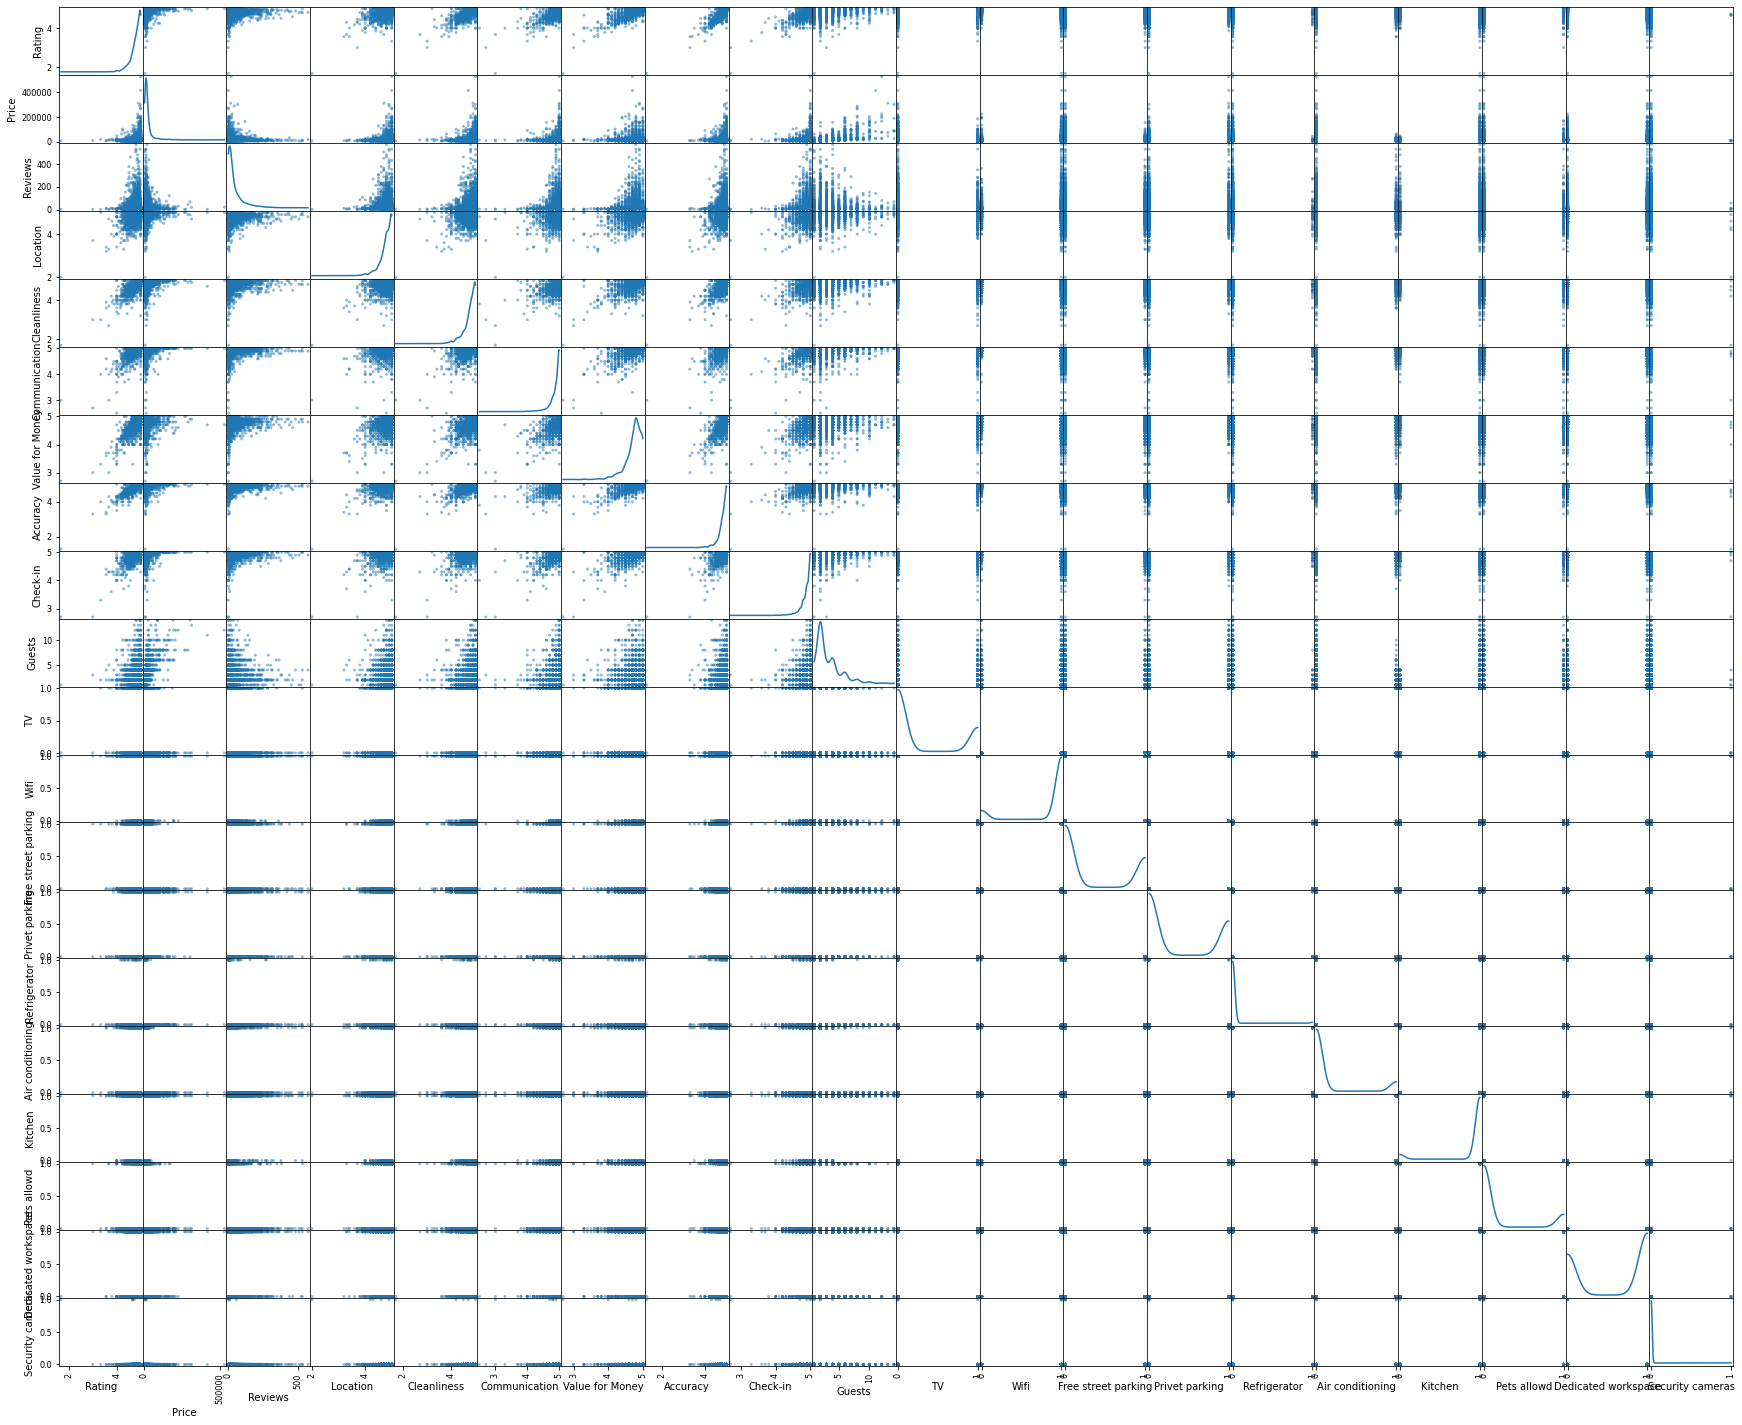

In [57]:
pd.plotting.scatter_matrix(df, figsize=(30, 25), diagonal='kde')
plt.show()

In [58]:

predictions = linear.predict(x) # make the predictions by the model
predictions

array([4.8682859 , 4.95915433, 4.9529012 , ..., 4.5507904 , 4.39005612,
       4.69077249])